# 6.6 Sourcing & Analyzing Time-Series Data

### Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
quandl.ApiConfig.api_key = '_MsPSN-55fb14z7--U1n'

In [5]:
#import
df = pd.read_csv('/Users/LuisD/Desktop/WB_DATA_d950d0cd269a601150c0afd03b234ee2.csv', index_col = False)


In [6]:
df.head()

,series_id,country_code,country_name,year,value
0,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1970,280488.417477
1,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1971,203873.439003
2,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1972,210371.610345
3,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1973,225710.677001
4,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1974,186188.848701


In [9]:
df.shape

(9109067, 5)

### Subsetting, wrangling, and cleaning time-series data

In [11]:
#Subsetting
df_nld = df[df['country_code'] == 'NLD']

In [13]:
print(df_nld.head())

              series_id country_code country_name  year         value
795         IT.CEL.SETS          NLD  Netherlands  1960      0.000000
3255  AG.LND.TOTL.RU.K2          NLD  Netherlands  2010  21411.863280
3479  AG.LND.EL5M.RU.ZS          NLD  Netherlands  2010     32.906244
3708  AG.LND.EL5M.RU.K2          NLD  Netherlands  2010  11258.824220
4258  EN.POP.EL5M.RU.ZS          NLD  Netherlands  2010      9.644586


In [15]:
print(f"Number of rows in df_nld: {df_nld.shape[0]}")

Number of rows in df_nld: 43173


In [17]:
print(df_nld.tail())

              series_id country_code country_name  year    value
9108071  IT.NET.USER.ZS          NLD  Netherlands  2019  93.2886
9108305  IT.NET.USER.ZS          NLD  Netherlands  2020  91.3333
9108544  IT.NET.USER.ZS          NLD  Netherlands  2021  92.0530
9108757  IT.NET.USER.ZS          NLD  Netherlands  2022  92.5197
9108892  IT.NET.USER.ZS          NLD  Netherlands  2023  97.0068


In [19]:
print(f"Number of rows in df_nld: {df_nld.shape[0]}")

Number of rows in df_nld: 43173


In [21]:
df_nld.head()

,series_id,country_code,country_name,year,value
795,IT.CEL.SETS,NLD,Netherlands,1960,0.000000
3255,AG.LND.TOTL.RU.K2,NLD,Netherlands,2010,21411.863280
3479,AG.LND.EL5M.RU.ZS,NLD,Netherlands,2010,32.906244
3708,AG.LND.EL5M.RU.K2,NLD,Netherlands,2010,11258.824220
4258,EN.POP.EL5M.RU.ZS,NLD,Netherlands,2010,9.644586


In [23]:
df = pd.read_csv('/Users/LuisD/Desktop/WB_METADATA_f7ce7fba293ccc6eb39cdf15fb097982.csv', index_col = False)

In [25]:
df.head()

,series_id,name,description
0,DC.DAC.DEUL.CD,"Net bilateral aid flows from DAC donors, Germa...",Net bilateral aid flows from DAC donors are th...
1,RQ.STD.ERR,Regulatory Quality: Standard Error,Regulatory Quality captures perceptions of the...
2,EN.POP.EL5M.UR.ZS,Urban population living in areas where elevati...,Urban population below 5m is the percentage of...
3,per_lm_alllm.cov_q1_tot,Coverage of unemployment benefits and ALMP in ...,Coverage of unemployment benefits and active l...
4,CC.EST,Control of Corruption: Estimate,Control of Corruption captures perceptions of ...


In [27]:
df_merged = df_nld.merge(df, on='series_id', how='left')

In [29]:
print(f"Number of rows in df_merged: {df_merged.shape[0]}")

Number of rows in df_merged: 43173


In [31]:
df_merged.head()

,series_id,country_code,country_name,year,value,name,description
0,IT.CEL.SETS,NLD,Netherlands,1960,0.000000,Mobile cellular subscriptions,Mobile cellular telephone subscriptions are su...
1,AG.LND.TOTL.RU.K2,NLD,Netherlands,2010,21411.863280,Rural land area (sq. km),"Rural land area in square kilometers, derived ..."
2,AG.LND.EL5M.RU.ZS,NLD,Netherlands,2010,32.906244,Rural land area where elevation is below 5 met...,Rural land area below 5m is the percentage of ...
3,AG.LND.EL5M.RU.K2,NLD,Netherlands,2010,11258.824220,Rural land area where elevation is below 5 met...,Rural land area below 5m is the total rural la...
4,EN.POP.EL5M.RU.ZS,NLD,Netherlands,2010,9.644586,Rural population living in areas where elevati...,Rural population below 5m is the percentage of...


In [33]:
unique_names = df_merged['name'].unique()
print(unique_names)

['Mobile cellular subscriptions' 'Rural land area (sq. km)'
 'Rural land area where elevation is below 5 meters (% of total land area)'
 ... 'Merchandise imports by the reporting economy (current US$)'
 'Age dependency ratio, young (% of working-age population)'
 'Individuals using the Internet (% of population)']


In [35]:
df_merged.tail()

,series_id,country_code,country_name,year,value,name,description
43168,IT.NET.USER.ZS,NLD,Netherlands,2019,93.2886,Individuals using the Internet (% of population),Internet users are individuals who have used t...
43169,IT.NET.USER.ZS,NLD,Netherlands,2020,91.3333,Individuals using the Internet (% of population),Internet users are individuals who have used t...
43170,IT.NET.USER.ZS,NLD,Netherlands,2021,92.0530,Individuals using the Internet (% of population),Internet users are individuals who have used t...
43171,IT.NET.USER.ZS,NLD,Netherlands,2022,92.5197,Individuals using the Internet (% of population),Internet users are individuals who have used t...
43172,IT.NET.USER.ZS,NLD,Netherlands,2023,97.0068,Individuals using the Internet (% of population),Internet users are individuals who have used t...


In [37]:
selected_names = [
    'Individuals using the Internet (% of population)',
    'Mobile cellular subscriptions',
    'New businesses registered (number)',
    'New business density (new registrations per 1,000 people ages 15-64)',
    'International tourism, receipts (current US$)',
    'International tourism, expenditures (current US$)'
]

df_selected = df_merged[df_merged['name'].isin(selected_names)]

In [39]:
print(df_selected.tail())

            series_id country_code country_name  year    value  \
43168  IT.NET.USER.ZS          NLD  Netherlands  2019  93.2886   
43169  IT.NET.USER.ZS          NLD  Netherlands  2020  91.3333   
43170  IT.NET.USER.ZS          NLD  Netherlands  2021  92.0530   
43171  IT.NET.USER.ZS          NLD  Netherlands  2022  92.5197   
43172  IT.NET.USER.ZS          NLD  Netherlands  2023  97.0068   

                                                   name  \
43168  Individuals using the Internet (% of population)   
43169  Individuals using the Internet (% of population)   
43170  Individuals using the Internet (% of population)   
43171  Individuals using the Internet (% of population)   
43172  Individuals using the Internet (% of population)   

                                             description  
43168  Internet users are individuals who have used t...  
43169  Internet users are individuals who have used t...  
43170  Internet users are individuals who have used t...  
43171  Inter

In [41]:
df_selected.info()


<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 43172
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   series_id     170 non-null    object 
 1   country_code  170 non-null    object 
 2   country_name  170 non-null    object 
 3   year          170 non-null    int64  
 4   value         170 non-null    float64
 5   name          170 non-null    object 
 6   description   170 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 10.6+ KB


In [43]:
df_selected_dropped = df_selected.drop(columns=['series_id', 'country_code', 'description'])

In [45]:
print(df_selected_dropped.head())

   country_name  year  value                           name
0   Netherlands  1960    0.0  Mobile cellular subscriptions
7   Netherlands  1965    0.0  Mobile cellular subscriptions
12  Netherlands  1975    0.0  Mobile cellular subscriptions
18  Netherlands  1976    0.0  Mobile cellular subscriptions
40  Netherlands  1977    0.0  Mobile cellular subscriptions


In [47]:
df_selected_dropped.head()

,country_name,year,value,name
0,Netherlands,1960,0.0,Mobile cellular subscriptions
7,Netherlands,1965,0.0,Mobile cellular subscriptions
12,Netherlands,1975,0.0,Mobile cellular subscriptions
18,Netherlands,1976,0.0,Mobile cellular subscriptions
40,Netherlands,1977,0.0,Mobile cellular subscriptions


In [49]:
df_selected_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 43172
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  170 non-null    object 
 1   year          170 non-null    int64  
 2   value         170 non-null    float64
 3   name          170 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.6+ KB


In [51]:
# Filter out data where the year is before 1998
df_filtered = df_selected_dropped[df_selected_dropped['year'] >= 1998]

In [53]:
df_filtered.head()


,country_name,year,value,name
62,Netherlands,1998,3351000.0,Mobile cellular subscriptions
63,Netherlands,1999,6745460.0,Mobile cellular subscriptions
64,Netherlands,2000,10800000.0,Mobile cellular subscriptions
65,Netherlands,2001,12200000.0,Mobile cellular subscriptions
66,Netherlands,2002,12100000.0,Mobile cellular subscriptions


In [55]:
# Create a subset containing only 'Mobile cellular subscriptions'
df_mobile_subscriptions = df_filtered[df_filtered['name'] == 'Mobile cellular subscriptions']

In [57]:
df_mobile_subscriptions.tail()

,country_name,year,value,name
83,Netherlands,2019,21800000.0,Mobile cellular subscriptions
84,Netherlands,2020,21400000.0,Mobile cellular subscriptions
85,Netherlands,2021,21900000.0,Mobile cellular subscriptions
86,Netherlands,2022,20700000.0,Mobile cellular subscriptions
87,Netherlands,2023,21200000.0,Mobile cellular subscriptions


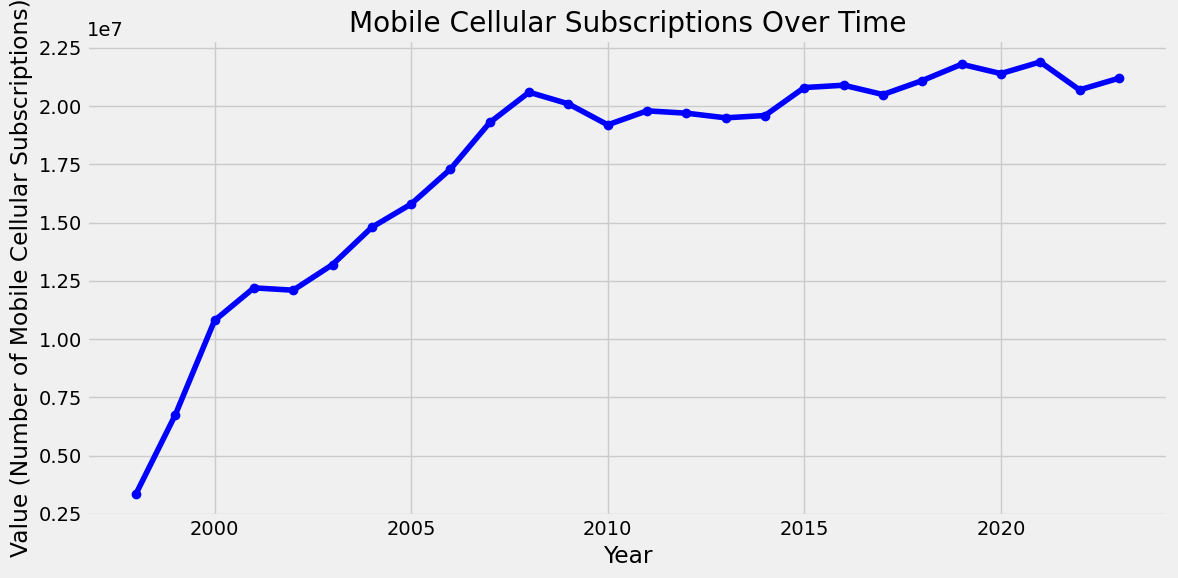

In [59]:
import matplotlib.pyplot as plt

# Plot the trend of 'value' over 'year' for 'Mobile cellular subscriptions'
plt.figure(figsize=(12, 6))
plt.plot(df_mobile_subscriptions['year'], df_mobile_subscriptions['value'], marker='o', color='b')
plt.title('Mobile Cellular Subscriptions Over Time')
plt.xlabel('Year')
plt.ylabel('Value (Number of Mobile Cellular Subscriptions)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
# Create a subset containing only 'Individuals using the Internet (% of population)'
df_internet_usage = df_filtered[df_filtered['name'] == 'Individuals using the Internet (% of population)']

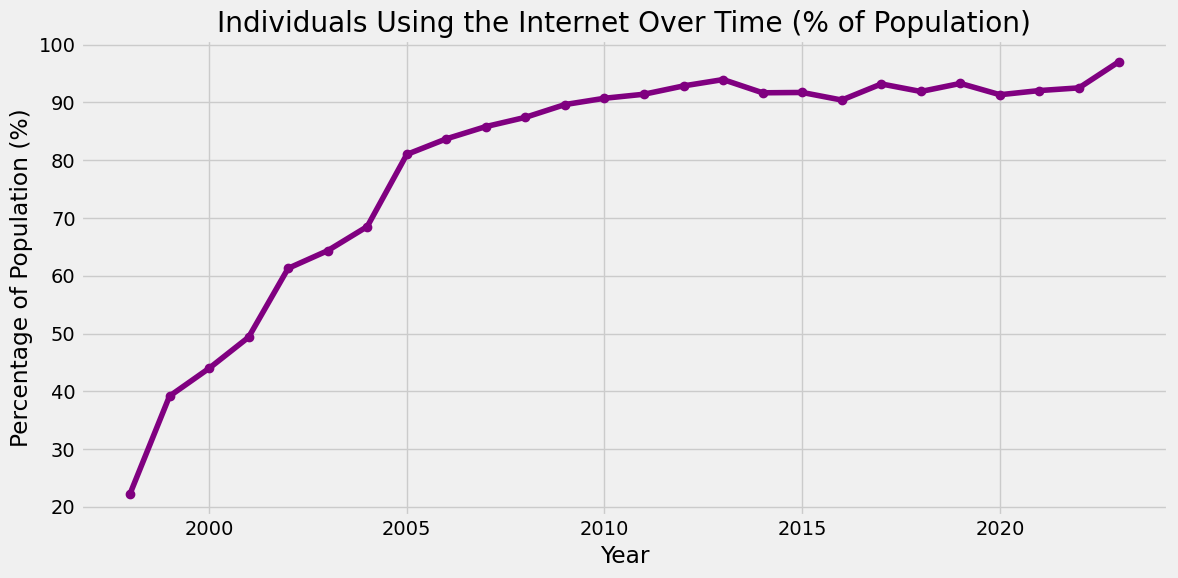

In [63]:
import matplotlib.pyplot as plt

# Plot the trend of 'value' (individuals using the Internet) over 'year'
plt.figure(figsize=(12, 6))
plt.plot(df_internet_usage['year'], df_internet_usage['value'], marker='o', color='purple')
plt.title('Individuals Using the Internet Over Time (% of Population)')
plt.xlabel('Year')
plt.ylabel('Percentage of Population (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

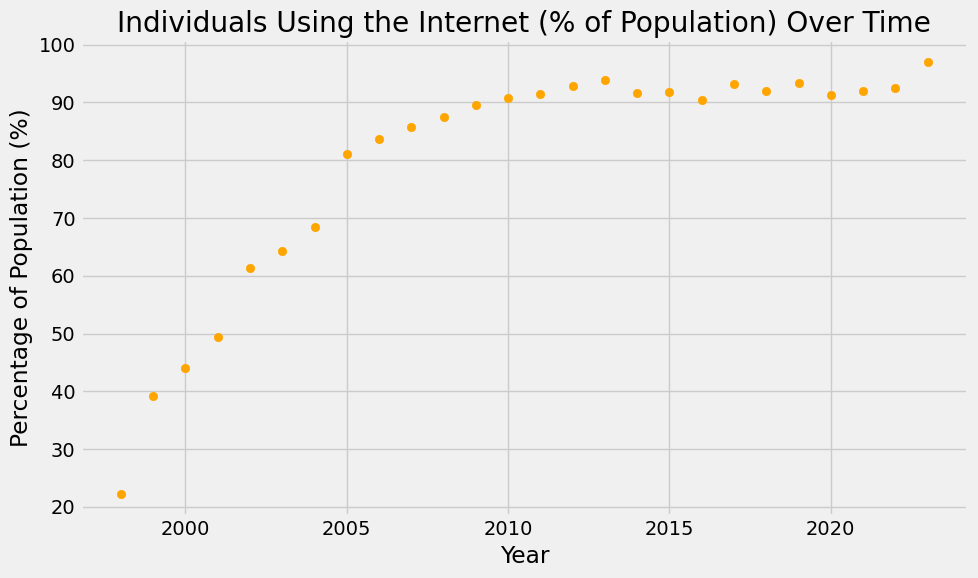

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(df_internet_usage['year'], df_internet_usage['value'], color='orange')
plt.title('Individuals Using the Internet (% of Population) Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Population (%)')
plt.tight_layout()
plt.show()

In [67]:
# Create a subset containing only 'International tourism, expenditures (current US$)'
df_tourism_expenditures = df_filtered[df_filtered['name'] == 'International tourism, expenditures (current US$)']

In [69]:
df_tourism_expenditures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 24156 to 31736
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  23 non-null     object 
 1   year          23 non-null     int64  
 2   value         23 non-null     float64
 3   name          23 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 920.0+ bytes


In [71]:
# Check for missing values in 'year' and 'value' columns
missing_values = df_tourism_expenditures[['year', 'value']].isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
year     0
value    0
dtype: int64


In [73]:
# Check for out-of-range values in 'year'
invalid_years = df_tourism_expenditures[(df_tourism_expenditures['year'] < 2000) | 
                                        (df_tourism_expenditures['year'] > 2023)]  # Adjust the range as necessary
print("Rows with invalid years:")
print(invalid_years)

# Check for negative or unrealistic values in 'value' (expenditures)
invalid_values = df_tourism_expenditures[df_tourism_expenditures['value'] < 0]
print("Rows with invalid values (negative expenditures):")
print(invalid_values)

Rows with invalid years:
      country_name  year         value  \
24156  Netherlands  1998  1.347400e+10   
24157  Netherlands  1999  1.346800e+10   

                                                    name  
24156  International tourism, expenditures (current US$)  
24157  International tourism, expenditures (current US$)  
Rows with invalid values (negative expenditures):
Empty DataFrame
Columns: [country_name, year, value, name]
Index: []


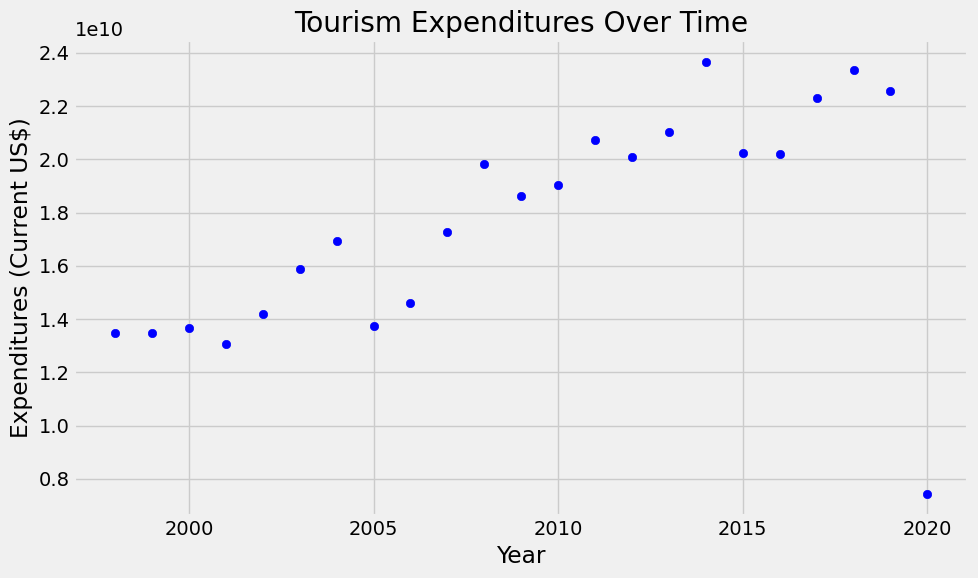

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(df_tourism_expenditures['year'], df_tourism_expenditures['value'], color='blue')
plt.title('Tourism Expenditures Over Time')
plt.xlabel('Year')
plt.ylabel('Expenditures (Current US$)')
plt.tight_layout()
plt.show()

In [77]:
# Exclude rows where 'year' is 2020
df_tourism_expenditures_filtered = df_tourism_expenditures[df_tourism_expenditures['year'] != 2020]

# Check the result
print(df_tourism_expenditures_filtered.head())

      country_name  year         value  \
24156  Netherlands  1998  1.347400e+10   
24157  Netherlands  1999  1.346800e+10   
24158  Netherlands  2000  1.364900e+10   
24159  Netherlands  2001  1.306100e+10   
24160  Netherlands  2002  1.420100e+10   

                                                    name  
24156  International tourism, expenditures (current US$)  
24157  International tourism, expenditures (current US$)  
24158  International tourism, expenditures (current US$)  
24159  International tourism, expenditures (current US$)  
24160  International tourism, expenditures (current US$)  


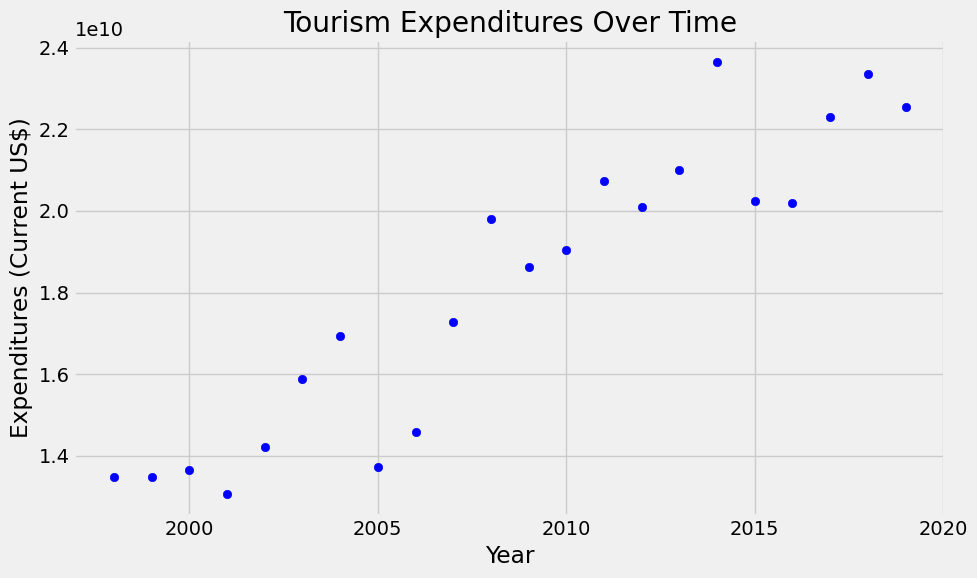

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(df_tourism_expenditures_filtered['year'], df_tourism_expenditures_filtered['value'], color='blue')
plt.title('Tourism Expenditures Over Time')
plt.xlabel('Year')
plt.ylabel('Expenditures (Current US$)')
plt.tight_layout()
plt.show()

I made subsets of Tourism Expenditures Over Time, Individuals Using the Internet (% of Population) Over Time, Mobile Cellular Subscriptions Over Time in Amsterdam to compare possible growth of the market since AIRBNB is an internet application. 


### Time-series analysis: decomposition¶

In [91]:
# Sort the data by 'year' to ensure it's in correct order
df_tourism_expenditures_filtered = df_tourism_expenditures_filtered.sort_values('year')

# Set 'year' as the index 
df_tourism_expenditures_filtered['date'] = pd.to_datetime(df_tourism_expenditures_filtered['year'], format='%Y')
df_tourism_expenditures_filtered.set_index('date', inplace=True)

In [94]:
import statsmodels.api as sm

# Decompose the time series using the 'value' column
decomposition = sm.tsa.seasonal_decompose(df_tourism_expenditures_filtered['value'], model='additive', period=1)


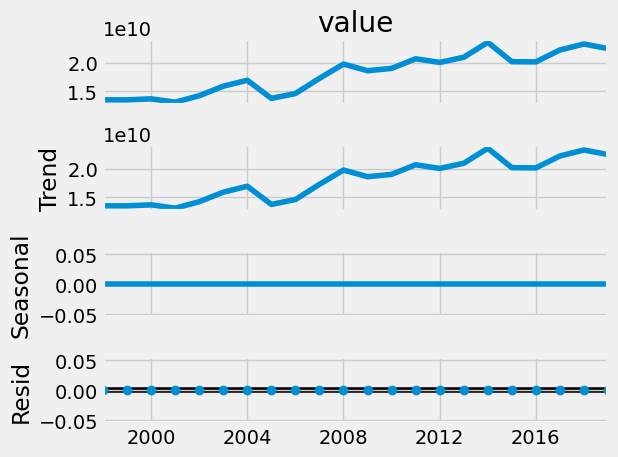

In [96]:
# Plot the decomposition
decomposition.plot()
plt.tight_layout()
plt.show()

In [98]:
# The level is Including all of its components showing a growing line over the years.
# The underlying trend shows that data doesn’t have much noise. the level and trend appear the same.
# the seasonality component is has not fluctuations. Showing we didn’t have any seasonality.
# The residual, with not noise.


In [100]:
# Sort the data by 'year' to ensure it's in correct order
df_internet_usage = df_internet_usage.sort_values('year')

# Set 'year' as the index 
df_internet_usage['date'] = pd.to_datetime(df_internet_usage['year'], format='%Y')
df_internet_usage.set_index('date', inplace=True)



In [102]:
# Decompose the time series using the 'value' column
decomposition = sm.tsa.seasonal_decompose(df_internet_usage['value'], model='additive', period=1)


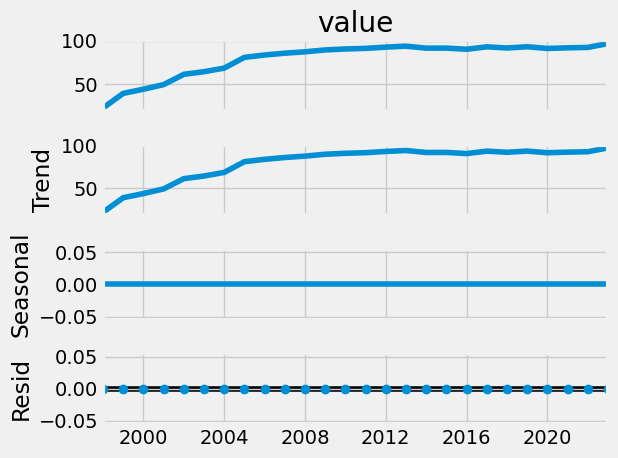

In [104]:
# Plot the decomposition
decomposition.plot()
plt.tight_layout()
plt.show()

In [106]:
# The level is Including all of its components showing a growing line over the years.
# The underlying trend shows that data doesn’t have much noise. the level and trend appear the same.
# the seasonality component is has not fluctuations. Showing we didn’t have any seasonality.
# The residual, with not noise.

### Test to check for stationarity.

In [112]:
from statsmodels.tsa.stattools import adfuller

In [114]:
# Conduct the Dickey-Fuller test on the 'value' column
result = adfuller(df_tourism_expenditures_filtered['value'])
# Print the results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -6.408435654342191
p-value: 1.917303359654093e-08
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}


In [116]:
## This indicates that the time series has a strong tendency to reject the null hypothesis of non-stationarity.
## The p-value is much smaller than 0.05, in fact, it’s much smaller than 0.01, meaning there’s strong evidence to reject the null hypothesis of a unit root, indicating that the time series is stationary.
## We conclude that the time series is stationary.

In [118]:
# Check out a plot of autocorrelations
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1000x600 with 0 Axes>

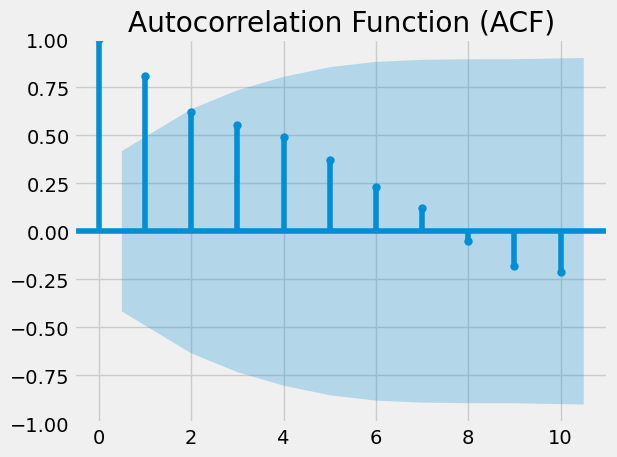

<Figure size 1000x600 with 0 Axes>

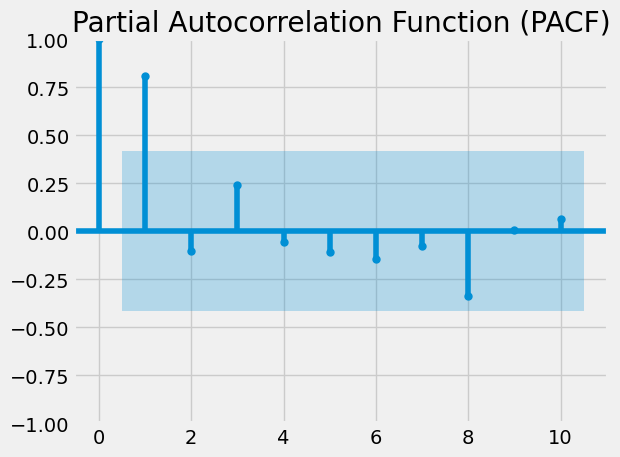

In [121]:
# ACF plot with a maximum of 10 lags (adjusted for PACF)
plt.figure(figsize=(10, 6))
plot_acf(df_tourism_expenditures_filtered['value'], lags=10)  # Adjusted lags to 10
plt.title('Autocorrelation Function (ACF)')
plt.tight_layout()
plt.show()

# PACF plot with a maximum of 10 lags (adjusted for PACF)
plt.figure(figsize=(10, 6))
plot_pacf(df_tourism_expenditures_filtered['value'], lags=10)  # Adjusted lags to 10
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()